In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import (
    get_kelly, filter_leverage, get_cumulative_returns, backtest
)

In [103]:
kospi = pd.read_csv('KOSPI200.csv')
kospi = kospi.iloc[::-1].reset_index(drop=True)
kospi = kospi.set_index('Date')

returns_kospi = kospi['Price'].pct_change()
shift_returns_kospi = returns_kospi.shift(-1)

expanding_kelly = get_kelly(returns_kospi)

parameters_df = pd.DataFrame()
parameters_df['kelly'] = expanding_kelly
parameters_df['Next day return'] = shift_returns_kospi
parameters_df['mean'] = returns_kospi.expanding(400).mean() 

In [104]:
returns_kospi.head(10)

Date
01/02/2004         NaN
01/05/2004    0.003938
01/06/2004   -0.001588
01/07/2004    0.005987
01/08/2004   -0.003162
01/09/2004    0.028545
01/12/2004    0.007618
01/13/2004   -0.003510
01/14/2004    0.002439
01/15/2004   -0.005767
Name: Price, dtype: float64

In [105]:
returns_kospi.expanding(2).mean().head(10)

Date
01/02/2004         NaN
01/05/2004         NaN
01/06/2004    0.001175
01/07/2004    0.002779
01/08/2004    0.001294
01/09/2004    0.006744
01/12/2004    0.006890
01/13/2004    0.005404
01/14/2004    0.005033
01/15/2004    0.003833
Name: Price, dtype: float64

In [106]:
kospi.head(2)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
01/02/2004,106.65,105.90,106.77,105.63,152.34M,1.37%
01/05/2004,107.07,106.01,107.23,105.96,156.85M,0.39%


In [107]:
parameters_df.head(2)

,kelly,Next day return,mean
Date,,,
08/11/2005,4.270014,0.004747,0.000867
08/12/2005,4.332445,-0.011915,0.000876


Text(0.5, 1.0, 'Kelly optimal $f^*$ prediction capacity')

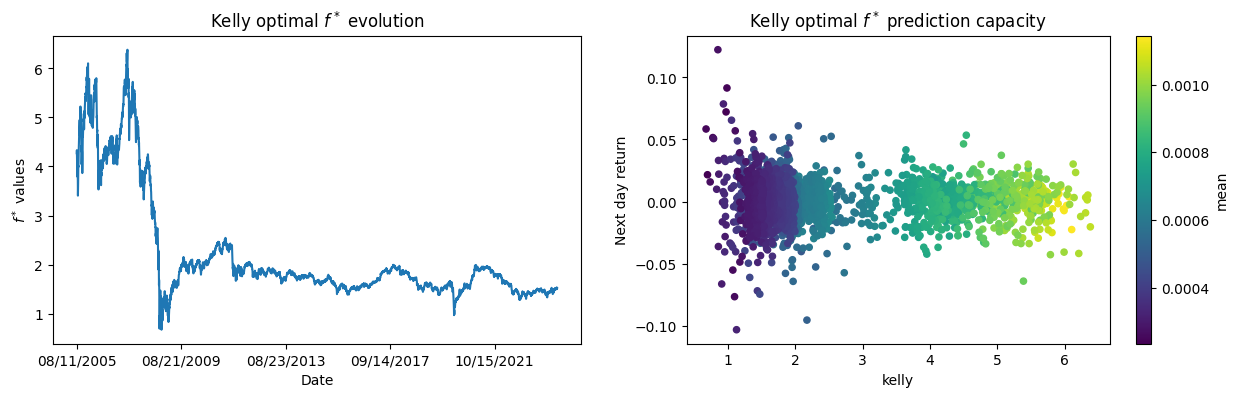

In [108]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 4))

expanding_kelly.plot(ax=ax[0])
ax[0].set_ylabel('$f^*$ values');
ax[0].set_title('Kelly optimal $f^*$ evolution');

parameters_df.plot.scatter(
    x='kelly', y='Next day return', c='mean', colormap='viridis', ax=ax[1],
)
ax[1].set_title('Kelly optimal $f^*$ prediction capacity')

In [109]:
all_returns_df = pd.DataFrame()

# set the leverages for 1 to 5
leverages = range(1, 6)

# returns starting in the first day available
first_date = expanding_kelly.index[0]
shift_returns_kospi = shift_returns_kospi[first_date:]

for leverage in leverages:
    filter_kelly = filter_leverage(expanding_kelly, leverage)
    
    name = 'max_leverage_' + str(leverage)    
    all_returns_df[name] = shift_returns_kospi * filter_kelly

    print(shift_returns_kospi * filter_kelly)
    print()
    print(all_returns_df)
    print()
    
all_returns_df['KOSPI'] = shift_returns_kospi

Date
08/11/2005    0.004747
08/12/2005   -0.011915
08/16/2005   -0.002980
08/17/2005   -0.018836
08/18/2005   -0.003400
                ...   
03/14/2024   -0.019881
03/15/2024    0.005342
03/18/2024   -0.011015
03/19/2024    0.016763
03/20/2024         NaN
Name: Price, Length: 4600, dtype: float64

            max_leverage_1
Date                      
08/11/2005        0.004747
08/12/2005       -0.011915
08/16/2005       -0.002980
08/17/2005       -0.018836
08/18/2005       -0.003400
...                    ...
03/14/2024       -0.019881
03/15/2024        0.005342
03/18/2024       -0.011015
03/19/2024        0.016763
03/20/2024             NaN

[4600 rows x 1 columns]

Date
08/11/2005    0.009494
08/12/2005   -0.023829
08/16/2005   -0.005960
08/17/2005   -0.037673
08/18/2005   -0.006801
                ...   
03/14/2024   -0.030503
03/15/2024    0.008061
03/18/2024   -0.016693
03/19/2024    0.025170
03/20/2024         NaN
Name: Price, Length: 4600, dtype: float64

            max_lever

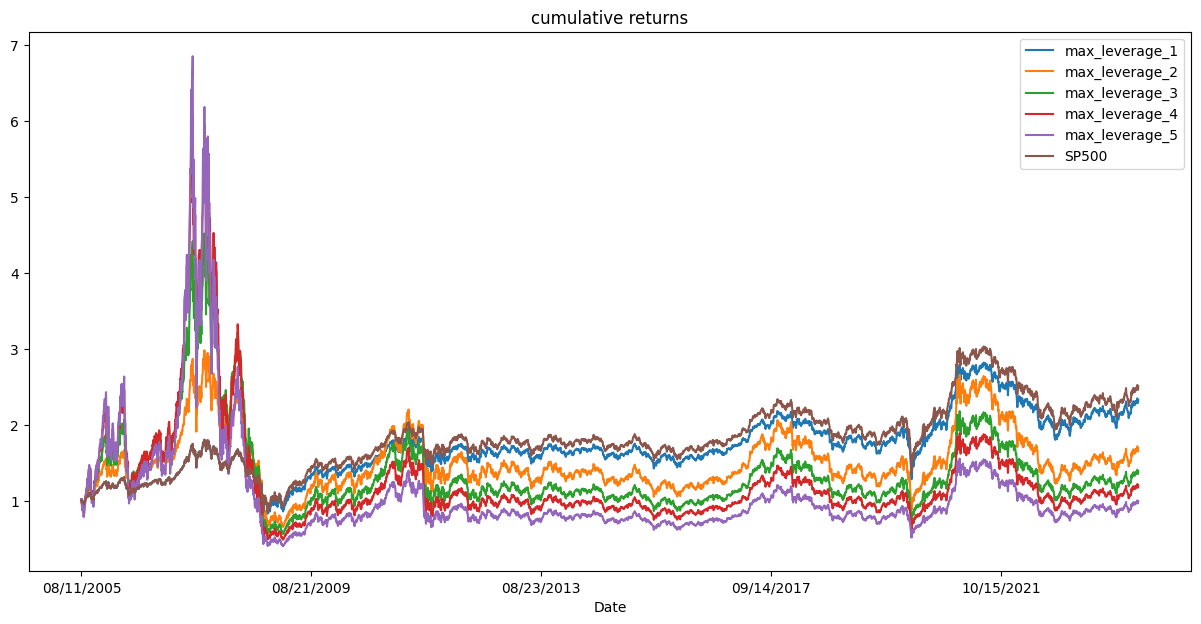

In [110]:
cum_returns = get_cumulative_returns(all_returns_df)

cum_returns.plot(figsize=(15, 7))
plt.title('cumulative returns');

### S&P 500

In [111]:
sp500 = pd.read_csv('SP500_mine.csv')
sp500 = sp500.iloc[::-1].reset_index(drop=True)
sp500 = sp500.set_index('Date')
sp500['Price'] = sp500['Price'].str.replace(',', '').astype(float)
sp500['Open'] = sp500['Open'].str.replace(',', '').astype(float)
sp500['High'] = sp500['High'].str.replace(',', '').astype(float)
sp500['Low'] = sp500['Low'].str.replace(',', '').astype(float)

returns_sp500 = sp500['Price'].pct_change()
shift_returns_sp500 = returns_sp500.shift(-1)

expanding_kelly_sp500 = get_kelly(returns_sp500)

parameters_df_sp500 = pd.DataFrame()
parameters_df_sp500['kelly'] = expanding_kelly_sp500
parameters_df_sp500['Next day return'] = shift_returns_sp500
parameters_df_sp500['mean'] = returns_sp500.expanding(400).mean() 

Text(0.5, 1.0, 'Kelly optimal $f^*$ prediction capacity')

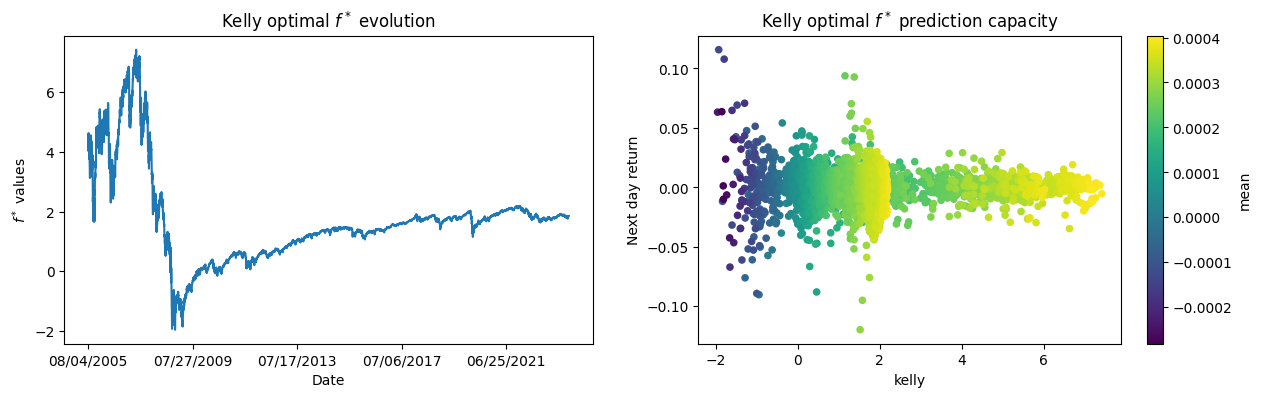

In [112]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 4))

expanding_kelly_sp500.plot(ax=ax[0])
ax[0].set_ylabel('$f^*$ values');
ax[0].set_title('Kelly optimal $f^*$ evolution');

parameters_df_sp500.plot.scatter(
    x='kelly', y='Next day return', c='mean', colormap='viridis', ax=ax[1],
)
ax[1].set_title('Kelly optimal $f^*$ prediction capacity')

In [113]:
all_returns_df_sp500 = pd.DataFrame()

# set the leverages for 1 to 5
leverages = range(1, 6)

# returns starting in the first day available
first_date = expanding_kelly_sp500.index[0]
shift_returns_sp500 = shift_returns_sp500[first_date:]

for leverage in leverages:
    filter_kelly = filter_leverage(expanding_kelly_sp500, leverage)
    
    name = 'max_leverage_' + str(leverage)    
    all_returns_df_sp500[name] = shift_returns_sp500 * filter_kelly
    
all_returns_df_sp500['SP500'] = shift_returns_sp500

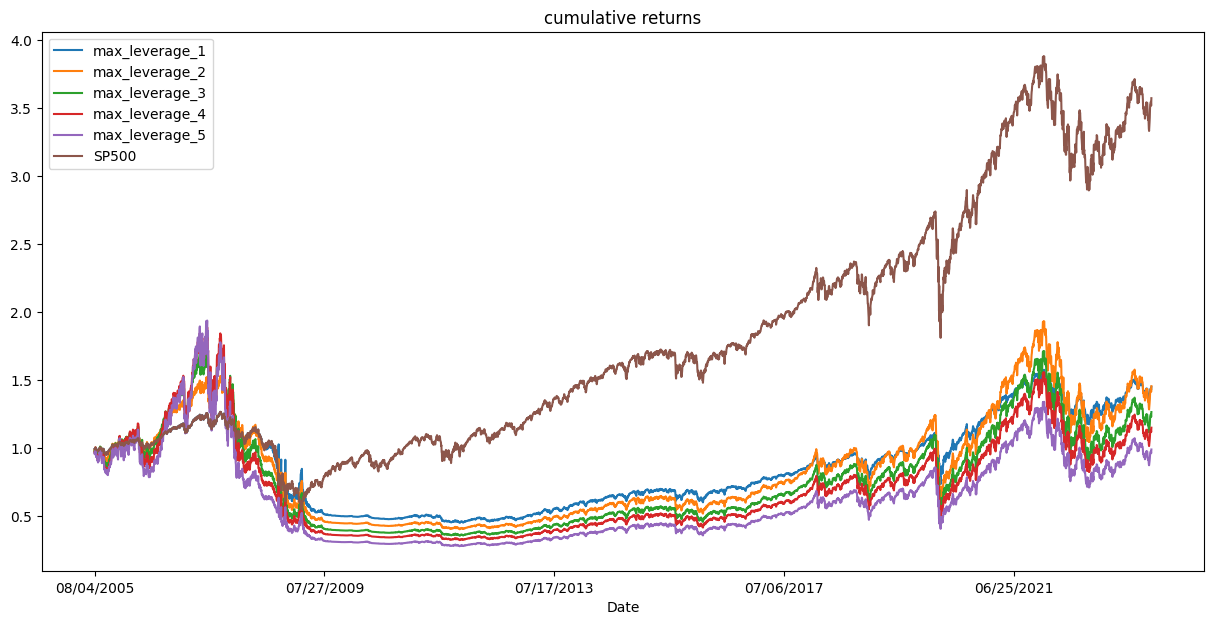

In [114]:
cum_returns_sp500 = get_cumulative_returns(all_returns_df_sp500)

cum_returns_sp500.plot(figsize=(15, 7))
plt.title('cumulative returns');